In [2]:
!pip install tensorflow==2.10.0 keras==2.10.0 tensorboard==2.10.0 tensorflow-estimator==2.10.0 protobuf==3.19.6


  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tensorboard-2.10.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
   ---------------------------------------- 1.8/455.9 MB 12.6 MB/s eta 0:00:37
   ---------------------------------------- 4.5/455.9 MB 11.7 MB/s eta 0:00:39
    --------------------------------------- 6.3/455.9 MB 11.4 MB/s eta 0:00:40
    --------------------------------------- 7.9/455.9 MB 10.1 MB/s eta 0:00:45
    --------------------------------------- 9.7/455.9 MB 10.1 MB/s eta 0:00:45
   - -------------------------------------- 11.8/455.9 MB 9.8 MB/s eta 0:00:46
   - -------------------------------------- 13.9/455.9 MB 9.9 MB/s eta 0:00:45
   - -------------------------------------- 16.3/455.9 MB 10.0 MB/s eta 0:00:44


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.39.0 requires protobuf<6,>=3.20, but you have protobuf 3.19.6 which is incompatible.


In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    a

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    a

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ModuleNotFoundError: No module named 'tensorflow.python.eager.polymorphic_function'

In [16]:
# Define the base directory and dataset paths
base_dir = "D:/chest-xray-fyp/Dataset - Copy"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Class labels
class_names = ['covid', 'normal', 'pneumonia', 'tuberculosis']


In [17]:
# Count the number of images in each class for train and test sets
def count_images_in_class(data_dir):
    class_counts = {}
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images_in_class(train_dir)
test_counts = count_images_in_class(test_dir)

print("Training Set Distribution:", train_counts)
print("Test Set Distribution:", test_counts)


Training Set Distribution: {'covid': 2892, 'normal': 4066, 'pneumonia': 3418, 'tuberculosis': 560}
Test Set Distribution: {'covid': 724, 'normal': 1017, 'pneumonia': 855, 'tuberculosis': 140}


In [18]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights based on the training distribution
class_labels = list(train_counts.keys())  # ['normal', 'pneumonia', 'tuberculosis', 'covid']
y_train_labels = [0]*train_counts['normal'] + [1]*train_counts['pneumonia'] + \
                 [2]*train_counts['tuberculosis'] + [3]*train_counts['covid']

# Convert class labels to a NumPy array
classes = np.array([0, 1, 2, 3])

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Computed Class Weights:", class_weights_dict)


Computed Class Weights: {0: 0.6724053123462863, 1: 0.7998829724985371, 2: 4.882142857142857, 3: 0.9453665283540802}


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


# Only rescaling for the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 10936 images belonging to 4 classes.
Found 2736 images belonging to 4 classes.


In [20]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

def build_model(base_model):
    base_model.trainable = True  # Freeze the base model weights

    # Define input layer matching the pre-trained model's input size
    inputs = Input(shape=(224, 224, 3))

    # Pass inputs through the base model
    x = base_model(inputs, training=False)

    # Add custom layers for classification
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

    # Create the final model
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Load the pre-trained models without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build models
resnet = build_model(resnet_base)

efficientnet = build_model(efficientnet_base)

# Display the summary of one model to verify the architecture
resnet.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                           

In [21]:
# Custom CNN Model
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
custom_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary
custom_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [22]:
history_cnn = custom_cnn.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)

Epoch 1/10
342/342 [==============================] - 169s 480ms/step - loss: 3.7639 - accuracy: 0.5768 - val_loss: 2.2310 - val_accuracy: 0.5976
Epoch 2/10
342/342 [==============================] - 178s 521ms/step - loss: 1.3089 - accuracy: 0.5606 - val_loss: 0.8945 - val_accuracy: 0.6414
Epoch 3/10
342/342 [==============================] - 167s 489ms/step - loss: 1.2616 - accuracy: 0.5214 - val_loss: 0.7543 - val_accuracy: 0.6261
Epoch 4/10
342/342 [==============================] - 173s 506ms/step - loss: 0.9812 - accuracy: 0.6248 - val_loss: 3.8004 - val_accuracy: 0.4470
Epoch 5/10
342/342 [==============================] - 161s 472ms/step - loss: 0.8904 - accuracy: 0.6398 - val_loss: 0.6803 - val_accuracy: 0.6630
Epoch 6/10
342/342 [==============================] - 164s 480ms/step - loss: 0.8481 - accuracy: 0.6451 - val_loss: 0.6111 - val_accuracy: 0.7116
Epoch 7/10
342/342 [==============================] - 164s 480ms/step - loss: 0.8990 - accuracy: 0.6409 - val_loss: 0.7088 -

In [1]:
history_resnet = resnet.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)

NameError: name 'resnet' is not defined

In [27]:
history_efficientnet = efficientnet.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)


Epoch 1/10


NotFoundError: Graph execution error:

Detected at node 'model_3/efficientnetb0/block5b_expand_conv/Conv2D' defined at (most recent call last):
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\wajiz.pk\AppData\Local\Temp\ipykernel_10608\504966140.py", line 1, in <module>
      history_efficientnet = efficientnet.fit(train_generator, validation_data=test_generator, epochs=10, class_weight=class_weights_dict)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\wajiz.pk\anaconda3\envs\py310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model_3/efficientnetb0/block5b_expand_conv/Conv2D'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 17082624 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 2: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 19587072 bytes.
  Profiling failure on CUDNN engine 4: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 198744064 bytes.
  Profiling failure on CUDNN engine 5: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 74780672 bytes.
	 [[{{node model_3/efficientnetb0/block5b_expand_conv/Conv2D}}]] [Op:__inference_train_function_65271]

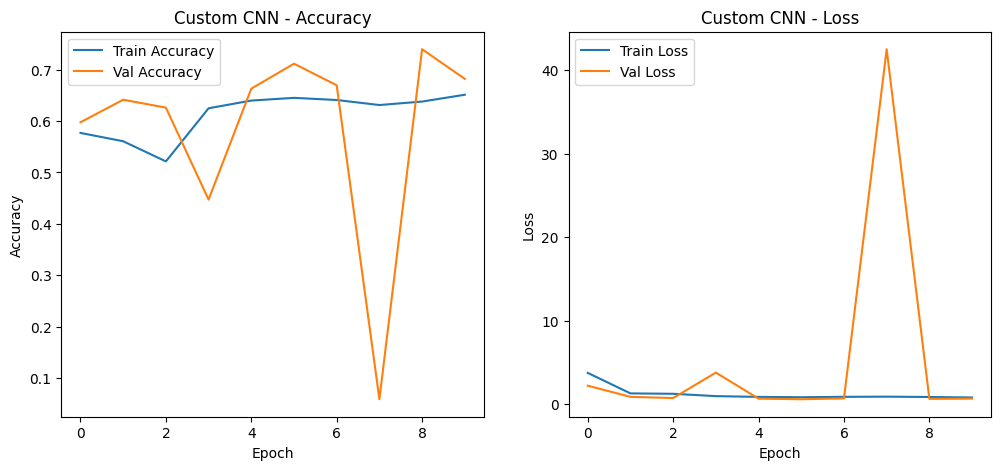

In [29]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, "Custom CNN")
#plot_history(history_resnet, "ResNet50")
#plot_history(history_efficientnet, "EfficientNetB0")


In [30]:
def evaluate_model(model, name):
    loss, accuracy = model.evaluate(test_generator)
    print(f'{name} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

evaluate_model(custom_cnn, "Custom CNN")
#evaluate_model(resnet, "ResNet50")
#evaluate_model(efficientnet, "EfficientNetB0")

86/86 [==============================] - 17s 193ms/step - loss: 0.6841 - accuracy: 0.6820
Custom CNN - Test Loss: 0.6841, Test Accuracy: 0.6820


86/86 [==============================] - 16s 191ms/step
Classification Report for Custom CNN:
               precision    recall  f1-score   support

       covid       0.86      0.21      0.34       724
      normal       0.57      0.83      0.68      1017
   pneumonia       0.79      0.97      0.87       855
tuberculosis       1.00      0.29      0.44       140

    accuracy                           0.68      2736
   macro avg       0.81      0.57      0.58      2736
weighted avg       0.74      0.68      0.64      2736



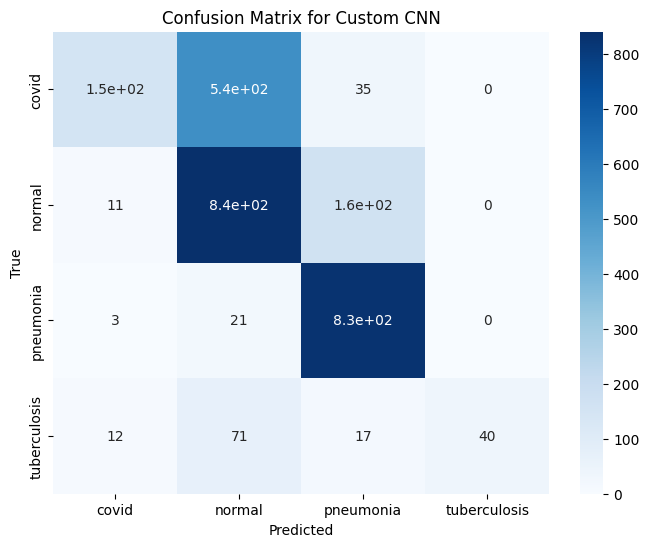

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def classification_metrics(model, name):
    y_pred = np.argmax(model.predict(test_generator), axis=1)
    y_true = test_generator.classes

    print(f"Classification Report for {name}:\n", classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

classification_metrics(custom_cnn, "Custom CNN")
#classification_metrics(resnet, "ResNet50")
#classification_metrics(efficientnet, "EfficientNetB0")
